# Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline #This line helps to visaulize in browser

In [2]:
#Import Dataset
df = pd.read_csv('Raw Data To Preprocess')

In [3]:
# Descriptoin might not be helpful since data is fake. 
df.describe()

,Years_of_Experience,Salaries
count,42.000000,49.00000
mean,5.000000,3323.22449
std,2.479182,746.46501
min,1.000000,2198.00000
25%,3.000000,2673.00000
50%,5.000000,3244.00000
75%,7.000000,3898.00000
max,10.000000,4817.00000


In [4]:
# Check information about null counts and datat types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Years_of_Experience    42 non-null float64
Cities                 44 non-null object
Salaries               49 non-null float64
Gender                 2 non-null object
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


# EDA


In [5]:
# One way of Checking null values in dataframe
df[['Years_of_Experience','Salaries', 'Cities','Gender']].isna().sum()

Years_of_Experience     8
Salaries                1
Cities                  6
Gender                 48
dtype: int64

Lets visulaize the dataframe with df.null(), and display it in heatmap. By doing this it will only present two colors one for true and another for False.

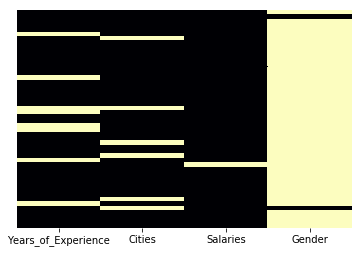

In [6]:
# Another way to visualize null values in a dataframe. 
sns.heatmap(data=df.isnull(),annot=False, yticklabels=False, cmap='magma', cbar=False)

**Now since the Gender column is almost all empty lets also check the values in Gender column that are not null.**

In [7]:
# Checking unique values in column 
df['Gender'].unique()

array([nan, 'M'], dtype=object)

**Since, only available value is M and almost all values are missing, it seems appropraite to drop the whole column to avoid biasness of model.** In python **df.drop()** can be used to drop the column.

In [8]:
df.drop(labels='Gender', axis=1, inplace=True)

In [9]:
df.info()
# This confirms dropping of 'Gender' column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Years_of_Experience    42 non-null float64
Cities                 44 non-null object
Salaries               49 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


**Now lets deal with other columns and their missing values.**

Import Imputer Library


In [10]:
from sklearn.preprocessing import Imputer

In [17]:
#Initialize our Imputer method with starategy 'mean' and missing_values to check as 'NAN'
imputer = Imputer(missing_values='NaN', strategy='mean')


Imputer takes numpy array with 2 dimensions as input. So, check type confirms it, but we have to reshape it from 1D to 2D as in line 20. Reshape can also be simply done by **your_arrary.reshape(-1,1) for 1D array**.

In [11]:
type(df.loc[:,'Years_of_Experience'])

pandas.core.series.Series

In [12]:
type(df.loc[:,'Years_of_Experience'].values) #df.columns.values gives array but need to resahpe it

numpy.ndarray

In [13]:
yrs_experience = df.loc[:,'Years_of_Experience'].values # Initialize and declare array 

In [14]:
np.shape(yrs_experience) # Its a one dimensional array 

(50,)

In [15]:
yrs_experience = yrs_experience.reshape(50,1) # Now we reshpe it to 2D. It can also be done as array.reshape(-1,1)

In [16]:
np.shape(yrs_experience) # This confirms our operation

(50, 1)

In [18]:
#After creating our 2D array we fit our imputer to array and transform it
imputer= imputer.fit_transform(yrs_experience)

In [19]:
yrs_experience= imputer # Re-assignment

In [20]:
df['Years_of_Experience']=yrs_experience # Re-assignment

In [21]:
df.info() # Check the new status of 'Years of Experience' now the nan values are replaced with mean by imputer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Years_of_Experience    50 non-null float64
Cities                 44 non-null object
Salaries               49 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


# Alternative For Imputer using Pandas

In [2]:
# The following line replaces the NAN with mean values 
# Try by uncommenting it 
#df['Years_of_Experience'] = df['Years_of_Experience'].fillna(value=df['Years_of_Experience'].mean())


**Now for the Cites column since its non-numeric lets use mode strategy. In statstics mode is most repating value in a list.**

If it were continuous value then python package name **scipy** provides module name stats that gives several mathematical function like mode. But our column is categorical so we have to be creative. Pandas value_counts() can be handy at this point.

In [23]:
# Chech most repititive value using value_counts()
#For us its 'Rovaniemi'
df['Cities'].value_counts().head(3)

Rovaniemi    10
Tampere       9
Helsinki      9
Name: Cities, dtype: int64

In [24]:
#From our custome mode method we got value 'Rovaniemi' 
# We replace the cities empty value with 'Rovaniemi'
df['Cities']=df['Cities'].fillna(value='Rovaniemi')

**Now for our salary column since missing value count is just one from (df.info()), we can either replace it with mean/median or just drop the row not column. The replacing part is similar process as above lets drop it for now. **

In [25]:
#If we want to find position of NaN value in a column.
df[df['Salaries'].isna()]

,Years_of_Experience,Cities,Salaries
35,5.0,Oulu,NaN


Above method is conditional operations popular is pandas. It gives the index of missing values since isna() provides true only for missing or NAN values. 

Now lets drop the whole row

In [26]:
#Since our only NaN value is in Salry column. It only drops one row.
df.dropna(axis=0, inplace=True)

In [27]:
# Now our data is free of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 3 columns):
Years_of_Experience    49 non-null float64
Cities                 49 non-null object
Salaries               49 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


**Since we dropped one row we now have only 49 rows**

# Dealing with Categorical Values

## Using OneHotEncoder and LabelEncoder

In [51]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Import values of all the df 

In [52]:
# Like Imputer the input here is also array
X = df.iloc[:,:].values


Declare label Encoder

In [53]:
cities_label_encoder = LabelEncoder()

In [55]:
# lets check the citys value
X[0:10,1]

array(['Oulu', 'Tampere', 'Helsinki', 'Turku', 'Rovaniemi', 'Oulu',
       'Rovaniemi', 'Helsinki', 'Turku', 'Rovaniemi'], dtype=object)

In [56]:
# Fit, Tranform and Reassign our City column
X[:,1] = cities_label_encoder.fit_transform(X[:,1])

In [57]:
# This confirms our operation since the cities are changed to numeric values
X[0:10,1]

array([1, 3, 0, 4, 2, 1, 2, 0, 4, 2], dtype=object)

Since, ML algorithm does not know our encoded labels are categorical changed to numerical basically a dummy variable, they can treat them as actual number. If that happens they might rate Turku higest with its value 4 and Helsinki lowest with its value 0. So, prevent that situation we use OneHotEncoder.
OneHotEnoder creates one column for each encoded labels i.e one column for each city's encoded_label. Whats the key thing is since our categorical dummy's are like true and false rather than points, onehotencoder takes care of that by providing values to newly create columns of either 0 or 1. 
For example after OneHotEncoding, 
1. 'Oulu' value will be a coulmn with name '1'.
2. All the rows before which have cities with values 'Oulu' will now have value of 1 as it emphasizes true
3. All the rows before which did not have cities with values 'Oulu' will now have value of 0 as it emphasizes false.
4. Same is the case for each cities in our case. For our df it will create 5 columns.


In [59]:
oneHotEncoder = OneHotEncoder(categorical_features=[1])

In [60]:
X=oneHotEncoder.fit_transform(X).toarray()

In [61]:
np.shape(X) # 5 cities column and 2 other column 'Salaries' and 'Years_Of_Experience'

(49, 7)

In [64]:
X[1] # Format is not in float

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
       4.607e+03])

# Alternative for Encoders Using Pandas

In [34]:
dummy_var = pd.get_dummies(df['Cities'], prefix='Dummy_Var_For_',drop_first=True)
dummy_var.head()


,Dummy_Var_For__Oulu,Dummy_Var_For__Rovaniemi,Dummy_Var_For__Tampere,Dummy_Var_For__Turku
0,1,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


**Notice something missing?** 

There is no dummy variable for city 'Helsinki'. It happend because of drop_first attribute in our get_dummies(). We do that to prevent our algorithm we are going to use in training to perfectly trace the pattern. If each cities are known and connected there algorithm will fit data perfectly in train but fail in test. See dummy variable trap articles for more info.

In [41]:
# WE need to concat and make a df to split, scale and train,test(further processing)
new_df = pd.concat(axis=1, objs=[df,dummy_var])

In [42]:
new_df.head(2)

,Years_of_Experience,Cities,Salaries,Dummy_Var_For__Oulu,Dummy_Var_For__Rovaniemi,Dummy_Var_For__Tampere,Dummy_Var_For__Turku
0,4.0,Oulu,4173.0,1,0,0,0
1,4.0,Tampere,4607.0,0,0,1,0


In [44]:
# Since cities column is changed to dummies we don't need it anymore. 
# So,lets drp it
new_df.drop(columns='Cities',inplace=True, axis=1)

In [45]:
new_df.head(2)

,Years_of_Experience,Salaries,Dummy_Var_For__Oulu,Dummy_Var_For__Rovaniemi,Dummy_Var_For__Tampere,Dummy_Var_For__Turku
0,4.0,4173.0,1,0,0,0
1,4.0,4607.0,0,0,1,0


**Further Development is not because since our other linear and KNN files also has similar processes. **